In [2]:
import pandas as pd

# Load the dataset from your Downloads folder
data = pd.read_csv('C:\\Users\\user\\Downloads\\airlines.csv')

# Display the first few rows of the dataframe
data.head()


,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
data.describe()

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [3]:
# Show a concise summary of the dataframe
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 3999 non-null   int64
 1   balance            3999 non-null   int64
 2   qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   bonus_miles        3999 non-null   int64
 7   bonus_trans        3999 non-null   int64
 8   flight_miles_12mo  3999 non-null   int64
 9   flight_trans_12    3999 non-null   int64
 10  days_since_enroll  3999 non-null   int64
 11  award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
# Check for missing values
data.isnull().sum()


id                   0
balance              0
qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
bonus_miles          0
bonus_trans          0
flight_miles_12mo    0
flight_trans_12      0
days_since_enroll    0
award                0
dtype: int64

In [7]:
print(data.cc1_miles.unique())
print(data.cc2_miles.unique())
print(data.cc3_miles.unique())

[1 4 3 2 5]
[1 2 3]
[1 3 2 4 5]


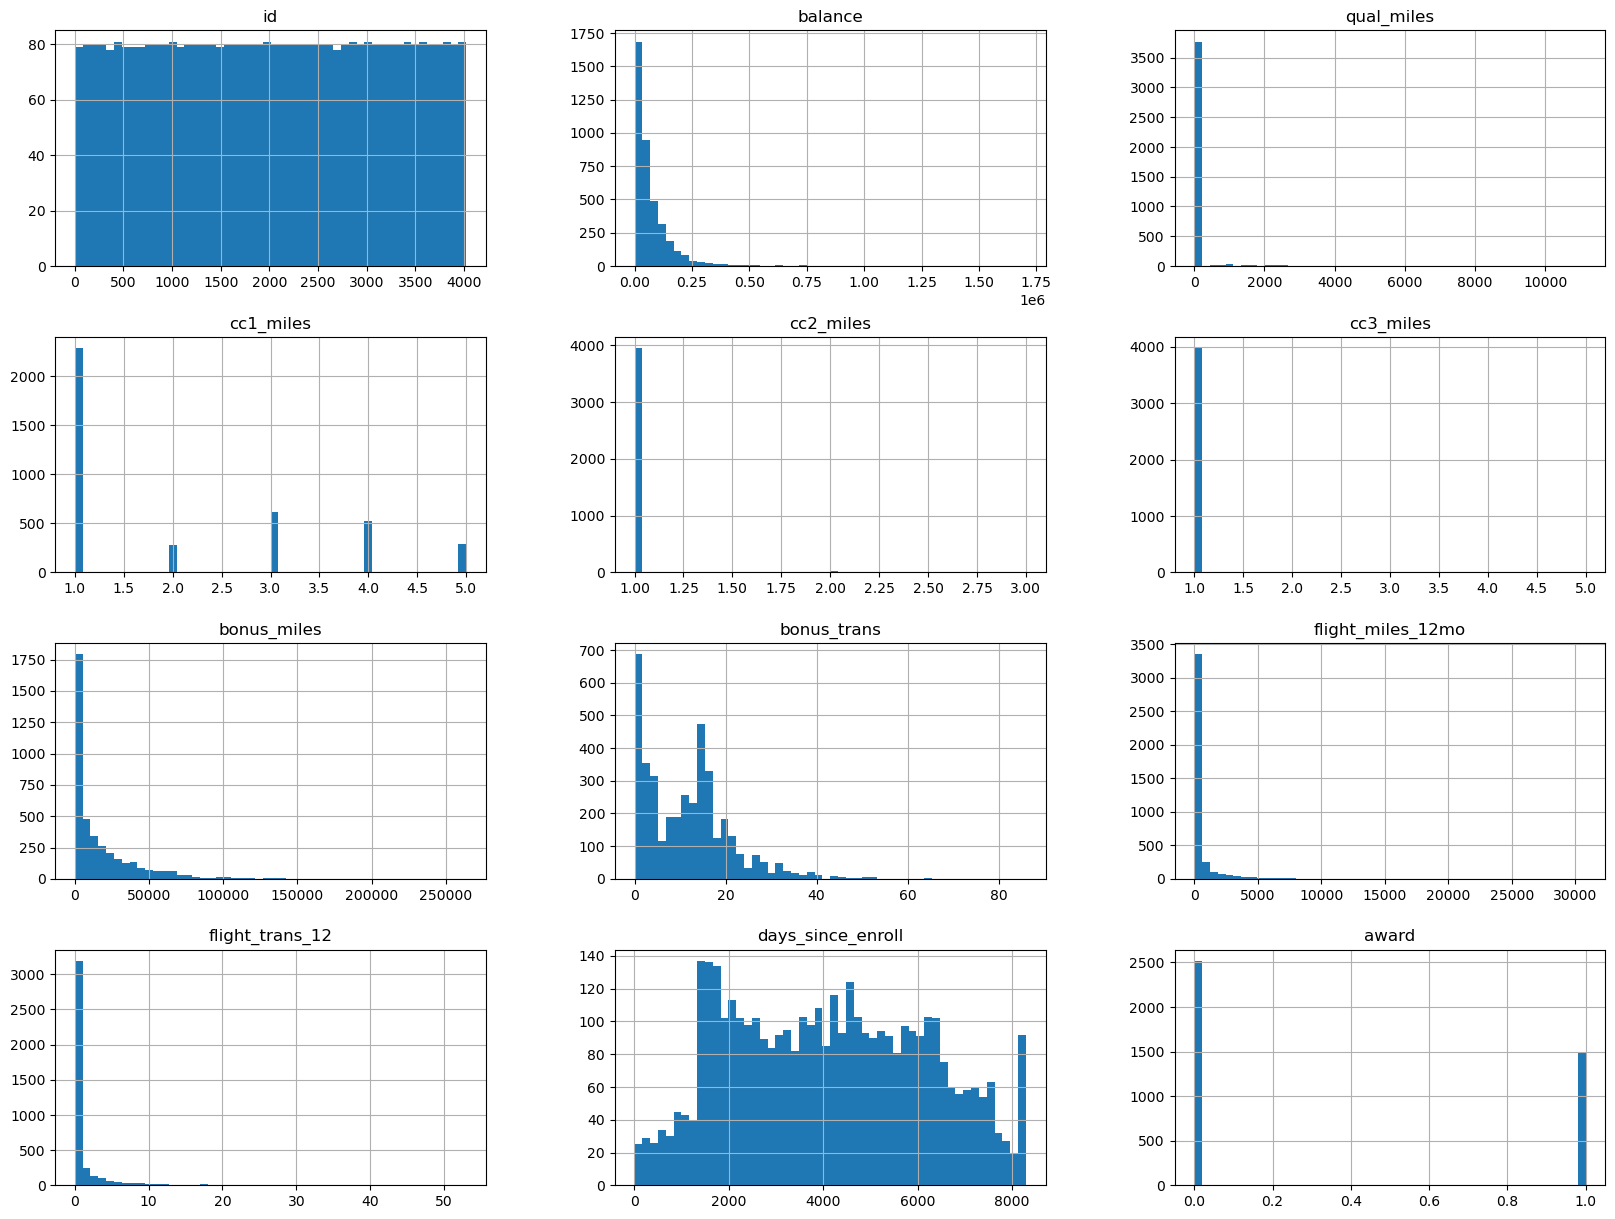

In [5]:
import matplotlib.pyplot as plt

# Histograms for each numerical feature
data.hist(bins=50, figsize=(20,15))
plt.show()


In [11]:
len(data[data.award == 0]) / len(data[data.award == 1])

1.700202565833896

In [6]:
# Calculate percentages
award_counts = data['award'].value_counts(normalize=True) * 100
print("Percentage of customers with an award: {:.2f}%".format(award_counts[1]))
print("Percentage of customers without an award: {:.2f}%".format(award_counts[0]))


Percentage of customers with an award: 37.03%
Percentage of customers without an award: 62.97%


balance              1.000000
bonus_miles          0.403487
cc1_miles            0.338344
bonus_trans          0.324935
days_since_enroll    0.263129
flight_trans_12      0.255700
flight_miles_12mo    0.217551
award                0.178494
qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
id                  -0.243737
Name: balance, dtype: float64


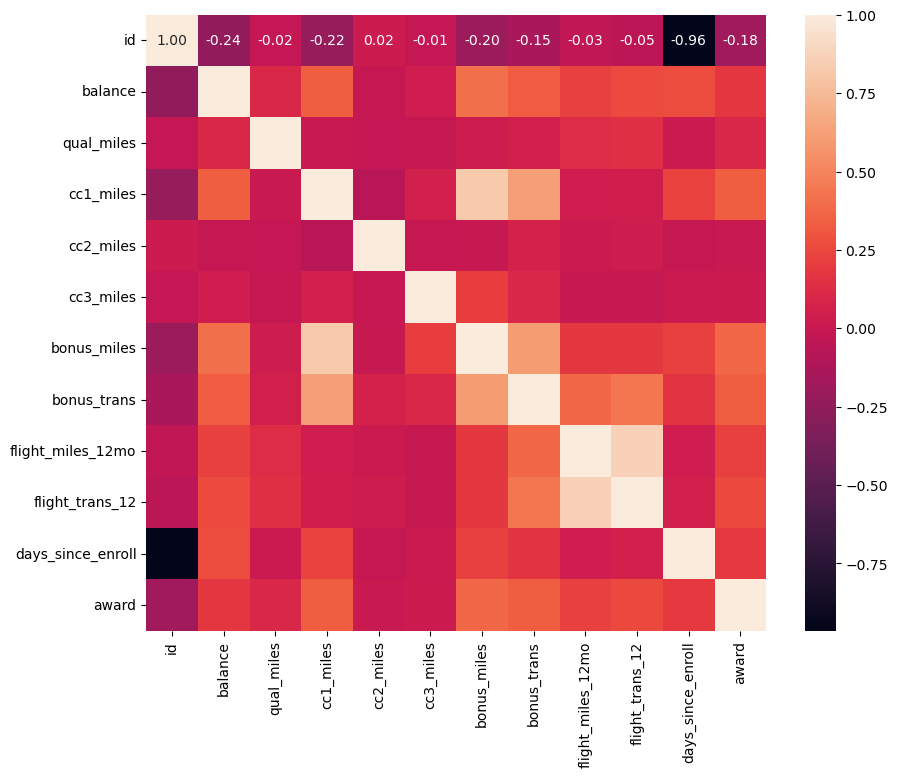

In [7]:
# Correlation matrix
corr_matrix = data.corr()

# Display the correlation values with 'balance'
print(corr_matrix['balance'].sort_values(ascending=False))

# Heatmap of the correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()


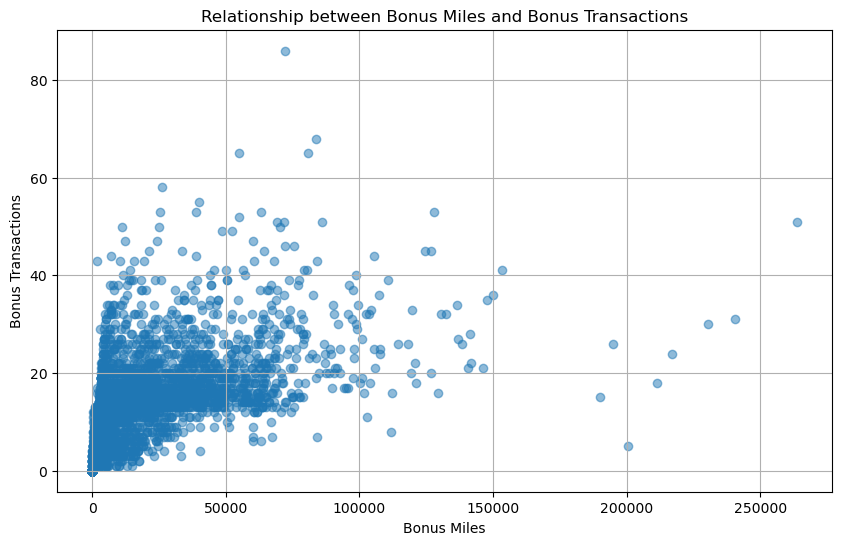

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(data['bonus_miles'], data['bonus_trans'], alpha=0.5)
plt.title('Relationship between Bonus Miles and Bonus Transactions')
plt.xlabel('Bonus Miles')
plt.ylabel('Bonus Transactions')
plt.grid(True)
plt.show()


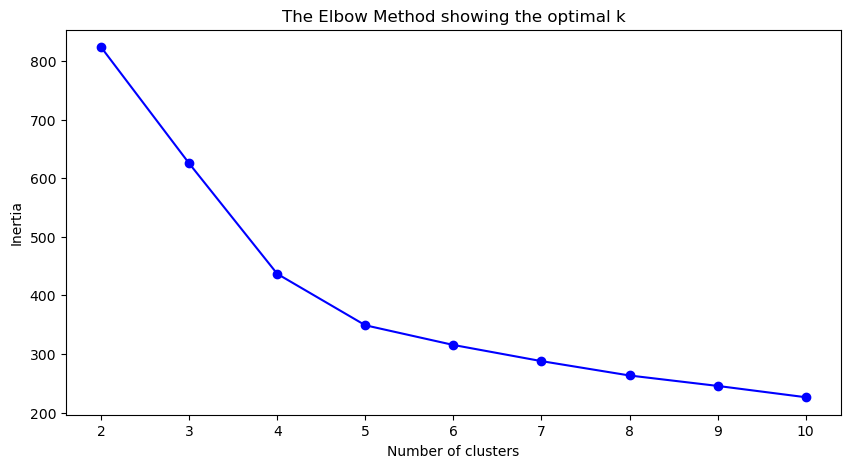

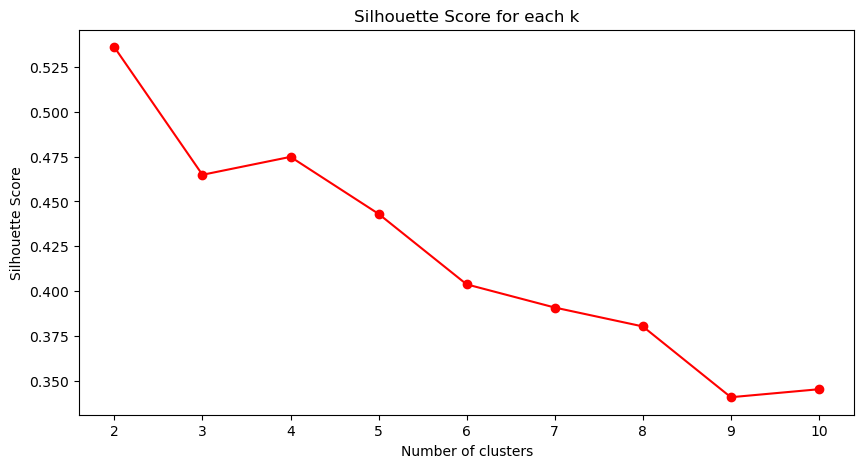

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop('id', axis=1))

# Elbow Method
inertia = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    # Set n_init to 10 explicitly to suppress the warning
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plotting the Elbow
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Plotting Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for each k')
plt.show()
